# **Material_2**

## **dataset: MNIST**

In [ ]:
! nvidia-smi

Tue Aug  6 09:53:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# !git clone https://github.com/jayaneetha/colorized-MNIST.git
# %cd colorized-MNIST

In [ ]:
!unzip colorized-MNIST-master.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1085.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1106.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1161.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1182.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1209.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1250.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1266.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1344.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1362.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1400.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1420.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1436.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1458.png  
  inflating: colorized-MNIST-master - E80%/testing/6/blue_1475.png  
  inflating: 

In [ ]:
# Data processing
import numpy as np  # Import numpy for numerical operations
import torch  # Import main PyTorch library
import torchvision  # Import torchvision for datasets and image transformations
import torch.nn as nn  # Import neural network module from torch
from matplotlib import pyplot as plt  # Import pyplot from matplotlib for plotting
from torch.utils.data import DataLoader, Subset  # Import DataLoader and Subset from torch.utils.data
import torch.optim as optim  # Import optim module from torch for optimization algorithms
import torchvision.transforms as transforms  # Import transforms from torchvision for image transformations
from torch.utils.data import random_split  # Import random_split from torch.utils.data for splitting datasets
from torch.utils.data import DataLoader, ConcatDataset, random_split  # Import DataLoader, ConcatDataset, and random_split from torch.utils.data
from torchvision import datasets, transforms  # Import datasets and transforms from torchvision

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Define the transformation to be applied to the images

all_set = datasets.ImageFolder(root='/content/colorized-MNIST-master/training', transform=transform)  # Load training dataset
test_dataset = datasets.ImageFolder(root='/content/colorized-MNIST-master/testing', transform=transform)  # Load test dataset
print(len(all_set)) # E_80% Red+Green data
print(len(test_dataset)) # Blue data

3697
3289


In [ ]:
subset_indices = list(range(3690))  # Create a list of indices for the subset
# subset_indices = list(range(3310))  # Create a list of indices for the subset

traning_set = Subset(all_set, subset_indices)  # Create a subset of the training dataset
print(len(traning_set))  # Print the length of the training set
print(len(test_dataset))  # Print the length of the test dataset
e12_, e34_ = random_split(dataset=traning_set, lengths=[1845, 1845], generator=torch.Generator().manual_seed(0))  # 80% Split the training set into two equal parts
# e12_, e34_ = random_split(dataset=traning_set, lengths=[1655, 1655], generator=torch.Generator().manual_seed(0))  # 90% Split the training set into two equal parts

3690
3289


In [ ]:
num_classes = 10  # Number of classes
samples_per_class = 10  # Number of samples to extract per class

In [ ]:
############################ e12 sample extract
extracted_samples_e12 = {class_idx: [] for class_idx in range(10)}  # Initialize a dictionary to store extracted samples
for idx, (image, label) in enumerate(e12_):  # Extract a specified number of samples from e12 dataset
    if len(extracted_samples_e12[label]) < 10:
        extracted_samples_e12[label].append(idx)
    if all(len(samples) == 10 for samples in extracted_samples_e12.values()):  # Check if the required number of samples have been extracted
        break
extracted_samples_flat_e12 = [sample_idx for samples in extracted_samples_e12.values() for sample_idx in samples]  # Flatten the extracted samples into a list
ee12_ = torch.utils.data.Subset(e12_, [idx for idx in range(len(e12_)) if idx not in extracted_samples_flat_e12])  # Remove extracted samples from e12
print(len(ee12_))  # Print the length of the remaining e12 dataset
extracted_subset_e12 = torch.utils.data.Subset(ee12_, extracted_samples_flat_e12)  # Create a subset of extracted samples
e12_extracted_loader = torch.utils.data.DataLoader(extracted_subset_e12, batch_size=100, shuffle=False, num_workers=0)  # Create DataLoader for the extracted subset
e12_extracted_loader_iter = iter(e12_extracted_loader)  # Create an iterator for the DataLoader
e12_extracted_loader_image, e12_extracted_loader_label = next(e12_extracted_loader_iter)  # Get the next batch of images and labels

############################ e34 sample extract
extracted_samples_e34 = {class_idx: [] for class_idx in range(10)}  # Initialize a dictionary to store extracted samples
for idx, (image, label) in enumerate(e34_):  # Extract a specified number of samples from e34 dataset
    if len(extracted_samples_e34[label]) < 10:
        extracted_samples_e34[label].append(idx)
    if all(len(samples) == 10 for samples in extracted_samples_e34.values()):  # Check if the required number of samples have been extracted
        break
extracted_samples_flat_e34 = [sample_idx for samples in extracted_samples_e34.values() for sample_idx in samples]  # Flatten the extracted samples into a list
ee34_ = torch.utils.data.Subset(e34_, [idx for idx in range(len(e34_)) if idx not in extracted_samples_flat_e34])  # Remove extracted samples from e34
print(len(ee34_))  # Print the length of the remaining e34 dataset
extracted_subset_e34 = torch.utils.data.Subset(ee34_, extracted_samples_flat_e34)  # Create a subset of extracted samples
e34_extracted_loader = torch.utils.data.DataLoader(extracted_subset_e34, batch_size=100, shuffle=False, num_workers=0)  # Create DataLoader for the extracted subset
e34_extracted_loader_iter = iter(e34_extracted_loader)  # Create an iterator for the DataLoader
e34_extracted_loader_image, e34_extracted_loader_label = next(e34_extracted_loader_iter)  # Get the next batch of images and labels
print(len(extracted_subset_e12))
print(len(extracted_subset_e34))

1745
1745
100
100


In [ ]:
e1234 = ConcatDataset([ee12_, ee34_])  # Concatenate the datasets ee12_ and ee34_
e3412 = ConcatDataset([ee34_, ee12_])  # Concatenate the datasets ee34_ and ee12_
e1234_loader = torch.utils.data.DataLoader(e1234, batch_size=5, shuffle=True, num_workers=0)  # Create DataLoader for the concatenated dataset e1234
e3412_loader = torch.utils.data.DataLoader(e3412, batch_size=5, shuffle=True, num_workers=0)  # Create DataLoader for the concatenated dataset e3412

s_test_set = datasets.ImageFolder(root='/content/colorized-MNIST-master/testing', transform=transform)  # Load the test dataset
s_test_loader = torch.utils.data.DataLoader(s_test_set, batch_size=3289, shuffle=False, num_workers=0)  # Create DataLoader for the test dataset
s_test_data_iter = iter(s_test_loader)  # Create an iterator for the test DataLoader
s_test_image, s_test_label = next(s_test_data_iter)  # Get the next batch of test images and labels
print(s_test_image.shape)  # Print the shape of the test images

##################
s_tra_set = datasets.ImageFolder(root='/content/colorized-MNIST-master/training', transform=transform)  # Load the training dataset
s_tra_loader = torch.utils.data.DataLoader(s_tra_set, batch_size=3690, shuffle=False, num_workers=0)  # Create DataLoader for the training dataset
s_tra_data_iter = iter(s_tra_loader)  # Create an iterator for the training DataLoader
s_tra_image, s_tra_label = next(s_tra_data_iter)  # Get the next batch of training images and labels

##################
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')  # Define the class labels

torch.Size([3289, 3, 28, 28])


In [ ]:
import random

## Sampling ## validation
############################ e12_ ###########################
class_indices = {class_idx: [] for class_idx in range(10)}  # Initialize dictionary to store class indices
for idx, (image, label) in enumerate(ee12_):  # Enumerate through ee12_ dataset
    class_indices[label].append(idx)  # Append index to corresponding class
sample_indices_12 = []
for class_idx, indices in class_indices.items():  # For each class, sample 10 indices
    sample_indices_12.extend(random.sample(indices, 10))
sample_e12 = torch.utils.data.Subset(ee12_, sample_indices_12)  # Create a subset of ee12_ with sampled indices
e12_s_loader = torch.utils.data.DataLoader(sample_e12, batch_size=100, shuffle=False, num_workers=0)  # DataLoader for the sampled subset
e12_s_loader_iter = iter(e12_s_loader)  # Create an iterator
e12_s_loader_image, e12_s_loader_label = next(e12_s_loader_iter)  # Get a batch of images and labels

############################ e34_ ###########################
class_indices = {class_idx: [] for class_idx in range(10)}  # Initialize dictionary to store class indices
for idx, (image, label) in enumerate(ee34_):  # Enumerate through ee34_ dataset
    class_indices[label].append(idx)  # Append index to corresponding class
sample_indices_34 = []
for class_idx, indices in class_indices.items():  # For each class, sample 10 indices
    sample_indices_34.extend(random.sample(indices, 10))
sample_e34 = torch.utils.data.Subset(ee34_, sample_indices_34)  # Create a subset of ee34_ with sampled indices
e34_s_loader = torch.utils.data.DataLoader(sample_e34, batch_size=100, shuffle=False, num_workers=0)  # DataLoader for the sampled subset
e34_s_loader_iter = iter(e34_s_loader)  # Create an iterator
e34_s_loader_image, e34_s_loader_label = next(e34_s_loader_iter)  # Get a batch of images and labels

In [ ]:
cuda = True if torch.cuda.is_available() else False

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### **Network1 : use only linear layers + Generalization Decision Process (GDP)**

In [ ]:
import argparse
import os
import numpy as np
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch

class LLNet(nn.Module):  # Use only linear layers
    def __init__(self):
        super(LLNet, self).__init__()

        self.fc1 = nn.Linear(3*28*28, 1000)  # First fully connected layer
        self.fc2 = nn.Linear(1000, 500)      # Second fully connected layer
        self.fc3 = nn.Linear(500, 100)       # Third fully connected layer
        self.fc4 = nn.Linear(100, 50)        # Fourth fully connected layer
        self.fc5 = nn.Linear(50, 25)         # Fifth fully connected layer
        self.fc6 = nn.Linear(25, 20)         # Sixth fully connected layer
        self.fc7 = nn.Linear(20, 10)         # Seventh fully connected layer (output layer)

    def forward(self, x):
        x = x.view(-1, 3*28*28)  # Flatten the input image
        x = self.fc1(x)  # Apply first fully connected layer
        x = self.fc2(x)  # Apply second fully connected layer
        x = self.fc3(x)  # Apply third fully connected layer
        x = self.fc4(x)  # Apply fourth fully connected layer
        x = self.fc5(x)  # Apply fifth fully connected layer
        x = self.fc6(x)  # Apply sixth fully connected layer
        x = self.fc7(x)  # Apply seventh fully connected layer (output)
        return x

loss_function = torch.nn.CrossEntropyLoss()  # Define the loss function
net = LLNet()  # Instantiate the network

# If a GPU is available, run everything in CUDA mode
if torch.cuda.is_available():
    net = net.cuda()  # Move the network to GPU
    loss_function = loss_function.cuda()  # Move the loss function to GPU

optimizer_L = torch.optim.Adam(net.parameters(), lr=0.001)  # Define the optimizer with a learning rate of 0.001

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter, defaultdict
from itertools import combinations
import random

a_train = []  # To store training accuracy
a_test = []  # To store test accuracy
lossaaa = []  # To store loss values
Inf = []  # To store information values
Var_all = []  # To store all variation values
Generalization_Ratio_ = []  # To store generalization ratios
dicide_action = []  # To store decision actions
loss_before = torch.tensor(30.0)  # Initial loss value
los = torch.tensor(30.0)  # Initial loss value
dis_before_A1 = torch.tensor(0)  # Distance before action A1
dis_before_A2 = torch.tensor(0)  # Distance before action A2
dis = torch.tensor(0.5)  # Distance increment
per = "N"  # Previous iteration's action
state_before = torch.tensor(0.0)  # Previous state value
categrary_number = 10  # Number of categories
tra_val_number = 2  # Training validation number

for epoch in range(10):  # Loop over the dataset multiple times
    e3412_iter = iter(e3412_loader)  # Iterator for e3412_loader
    running_loss = 0.0  # Running loss
    running_loss_all = 0.0  # Running loss for all
    loss_before = Variable(loss_before, requires_grad=False)  # Make loss_before a variable
    los = Variable(los, requires_grad=False)  # Make los a variable
    state_before = Variable(state_before, requires_grad=False)  # Make state_before a variable
    dis_before_A1 = Variable(dis_before_A1, requires_grad=False)  # Make dis_before_A1 a variable
    dis_before_A2 = Variable(dis_before_A2, requires_grad=False)  # Make dis_before_A2 a variable
    acc_A1 = Variable(dis_before_A1, requires_grad=False)  # Make acc_A1 a variable
    acc_A2 = Variable(dis_before_A2, requires_grad=False)  # Make acc_A2 a variable
    dis_ = Variable(dis, requires_grad=False)  # Make dis a variable

    for step, (imgs, labels) in enumerate(e1234_loader):  # Iterate over the data
        ### calculate losses
        weight_val_probility = 1.0 / tra_val_number  # Weight for validation probability
        labels = labels.cuda()  # Move labels to GPU
        imgs = imgs.cuda()  # Move images to GPU
        out_e1234 = net(imgs)  # Get output from the network
        loss_out_e1234 = loss_function(out_e1234, labels)  # Calculate loss for e1234 (A1)

        e3412_imgs, e3412_labels = next(e3412_iter)  # Get next batch from e3412_iter
        e3412_imgs = e3412_imgs.cuda()  # Move e3412 images to GPU
        e3412_labels = e3412_labels.cuda()  # Move e3412 labels to GPU
        out_e3412 = net(e3412_imgs)  # Get output from the network
        loss_out_e3412 = loss_function(out_e3412, e3412_labels)  # Calculate loss for e3412 (A3)

        #################### extract
        ## e1 ext count
        e12_extracted_loader_image = e12_extracted_loader_image.cuda()  # Move e12 extracted images to GPU
        e12_extracted_loader_label = e12_extracted_loader_label.cuda()  # Move e12 extracted labels to GPU
        e12_extracted_out = net(e12_extracted_loader_image).detach()  # Get detached output from the network
        e12_extracted = torch.max(e12_extracted_out, dim=1)[1]  # Get max output indices

        ## e2 ext count
        e34_extracted_loader_image = e34_extracted_loader_image.cuda()  # Move e34 extracted images to GPU
        e34_extracted_loader_label = e34_extracted_loader_label.cuda()  # Move e34 extracted labels to GPU
        e34_extracted_out = net(e34_extracted_loader_image).detach()  # Get detached output from the network
        e34_extracted = torch.max(e34_extracted_out, dim=1)[1]  # Get max output indices

        ########### e1 count
        e12_s_loader_image = e12_s_loader_image.cuda()  # Move e12 sample images to GPU
        e12_s_loader_label = e12_s_loader_label.cuda()  # Move e12 sample labels to GPU
        e12_inform_out = net(e12_s_loader_image).detach()  # Get detached output from the network
        e12_inform = torch.max(e12_inform_out, dim=1)[1]  # Get max output indices
        split_e12_inform = torch.chunk(e12_inform, 10)  # Split e12 inform into 10 chunks
        split_e12_inform = list(split_e12_inform)  # Convert split into list

        for i in range(len(split_e12_inform)):
            counts_E12 = torch.bincount(split_e12_inform[i], minlength=10)  # Count occurrences
            counts_e12 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e12[category] = counts_E12[category]  # Update counts
            split_e12_inform[i] = counts_e12  # Store updated counts

        ########### e2 count
        e34_s_loader_image = e34_s_loader_image.cuda()  # Move e34 sample images to GPU
        e34_s_loader_label = e34_s_loader_label.cuda()  # Move e34 sample labels to GPU
        e34_inform_out = net(e34_s_loader_image).detach()  # Get detached output from the network
        e34_inform = torch.max(e34_inform_out, dim=1)[1]  # Get max output indices
        split_e34_inform = torch.chunk(e34_inform, 10)  # Split e34 inform into 10 chunks
        split_e34_inform = list(split_e34_inform)  # Convert split into list

        for i in range(len(split_e34_inform)):
            counts_E34 = torch.bincount(split_e34_inform[i], minlength=10)  # Count occurrences
            counts_e34 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e34[category] = counts_E34[category]  # Update counts
            split_e34_inform[i] = counts_e34  # Store updated counts

        ##########
        ## IN_IN_pro
        counts_i_12 = torch.bincount(e12_inform, minlength=10)  # Count occurrences for e12 inform
        counts_i_34 = torch.bincount(e34_inform, minlength=10)  # Count occurrences for e34 inform
        counts_in_12 = torch.zeros(10)  # Initialize counts
        counts_in_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_in_12[category] = counts_i_12[category]  # Update counts for e12
        total_samples_in_12 = len(e12_inform)  # Total samples in e12

        for category in range(10):
            counts_in_34[category] = counts_i_34[category]  # Update counts for e34
        total_samples_in_34 = len(e34_inform)  # Total samples in e34

        min_denominator_in_12 = total_samples_in_12 * 1e-6  # Minimum denominator for e12
        probabilities_in_12 = counts_in_12 / (total_samples_in_12 + min_denominator_in_12)  # Probabilities for e12
        probabilities_tensor_in_12 = probabilities_in_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12

        min_denominator_in_34 = total_samples_in_34 * 1e-6  # Minimum denominator for e34
        probabilities_in_34 = counts_in_34 / (total_samples_in_34 + min_denominator_in_34)  # Probabilities for e34
        probabilities_tensor_in_34 = probabilities_in_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34

        counts_ext_12 = torch.bincount(e12_extracted, minlength=10)  # Count occurrences for e12 extracted
        counts_ext_34 = torch.bincount(e34_extracted, minlength=10)  # Count occurrences for e34 extracted
        counts_extra_12 = torch.zeros(10)  # Initialize counts
        counts_extra_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_extra_12[category] = counts_ext_12[category]  # Update counts for e12 extracted
        total_extracted_in_12 = len(e12_extracted)  # Total extracted samples in e12

        for category in range(10):
            counts_extra_34[category] = counts_ext_34[category]  # Update counts for e34 extracted
        total_extracted_in_34 = len(e34_extracted)  # Total extracted samples in e34

        min_denominator_ext_12 = total_extracted_in_12 * 1e-6  # Minimum denominator for e12 extracted
        probabilities_ext_12 = counts_extra_12 / (total_extracted_in_12 + min_denominator_ext_12)  # Probabilities for e12 extracted
        probabilities_tensor_extra_12 = probabilities_ext_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12 extracted

        min_denominator_ext_34 = total_extracted_in_34 * 1e-6  # Minimum denominator for e34 extracted
        probabilities_ext_34 = counts_extra_34 / (total_extracted_in_34 + min_denominator_ext_34)  # Probabilities for e34 extracted
        probabilities_tensor_extra_34 = probabilities_ext_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34 extracted

        ############################### Variation x ###################################
        in_12_all = probabilities_tensor_in_12
        in_34_all = probabilities_tensor_in_34
        in_12_extra = probabilities_tensor_extra_12
        in_34_extra = probabilities_tensor_extra_34
        weight_tra_probility_all = 1.0 / 2
        dow_all = \
              (in_12_all*weight_tra_probility_all + in_34_all*weight_tra_probility_all +
              in_12_extra*weight_tra_probility_all + in_34_extra*weight_tra_probility_all + 1e-30)
        in_1_all = (in_12_all*weight_tra_probility_all) / dow_all
        in_2_all = (in_34_all*weight_tra_probility_all) / dow_all
        e_1_all = (in_12_extra*weight_tra_probility_all) / dow_all
        e_2_all = (in_34_extra*weight_tra_probility_all) / dow_all
        in_1_all = in_1_all[0]
        in_2_all = in_2_all[0]
        e_1_all = e_1_all[0]
        e_2_all = e_2_all[0]
        d_KL_all = torch.zeros(10)
        k_divergence_all = (in_1_all + 1e-30) * torch.log(in_1_all / (e_1_all + 1e-30) + 1e-30)
        k_divergence_all_ = (in_1_all + 1e-30) * torch.log(in_1_all / (e_2_all + 1e-30) + 1e-30)
        d_KL_all = torch.max(abs(k_divergence_all))
        d_KL_all_ = torch.max(abs(k_divergence_all_))
        Variation_all = torch.max(d_KL_all, d_KL_all_)
        Var_all.append(Variation_all)

        ############################ Information ###################################
        all_combinations = list(combinations(range(10), 2))
        K = categrary_number * (categrary_number - 1)
        result_tensor = torch.zeros(len(all_combinations) * 2)  # Calculate the difference of each pair of combinations and store in result tensor
        for c in range(10):
            for idx, (i, j) in enumerate(all_combinations):
                s1 = abs(((split_e12_inform[c][i]/10) + 1e-30) * torch.log((split_e12_inform[c][i]/10) / ((split_e12_inform[c][j]/10) + 1e-30) + 1e-30))
                s3 = abs(((split_e34_inform[c][i]/10) + 1e-30) * torch.log((split_e34_inform[c][i]/10) / ((split_e34_inform[c][j]/10) + 1e-30) + 1e-30))
                min_value = torch.min(s1, s3)
                result_tensor[idx] = min_value.item()
                idx_ = idx + len(all_combinations)
                s1_ = abs(((split_e12_inform[c][j]/10) + 1e-30) * torch.log((split_e12_inform[c][j]/10) / ((split_e12_inform[c][i]/10) + 1e-30) + 1e-30))
                s3_ = abs(((split_e34_inform[c][j]/10) + 1e-30) * torch.log((split_e34_inform[c][j]/10) / ((split_e34_inform[c][i]/10) + 1e-30) + 1e-30))
                min_value_ = torch.min(s1_, s3_)
                result_tensor[idx_] = min_value_.item()
        Information = torch.sum(result_tensor) / K
        Inf.append(Information)

        ############################ Generalization_Ratio ###################################
        Generalization_Ratio = Variation_all * (Information + 1.0) / Information

        ############################ Generalization Decision Process (GDP) ###################################
        state_now = Generalization_Ratio
        loss_before = loss_before.cuda()
        state_before = state_before.cuda()
        state_dis = state_now - state_before
        result_tensor = torch.cat((loss_out_e1234.unsqueeze(0), loss_out_e3412.unsqueeze(0)), 0)

        # Because two datasets loss_out_e1234 and loss_out_e3412 are used, and there are actions A1 and A2,
        # choose one based on the reward
        if state_dis >= 0.0:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
        else:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"

        ####################################
        #### optimizer
        los = loss - loss_before
        state_before = state_now
        optimizer_L.zero_grad()
        loss.backward()
        optimizer_L.step()
        loss_before = loss
        running_loss += loss.item()

        # Print statistics
        if step % 5 == 4:  # Print every 500 mini-batches
            with torch.no_grad():  # 'with' is a context manager
                s_test_image = s_test_image.cuda()
                s_test_label = s_test_label.cuda()
                s_tra_image = s_tra_image.cuda()
                s_tra_label = s_tra_label.cuda()
                outputs = net(s_test_image)  # [batch, 10]
                predict_y = torch.max(outputs, dim=1)[1]
                accuracy = torch.eq(predict_y, s_test_label).sum().item() / s_test_label.size(0)
                a_test.append(float(accuracy))
                outputs_t = net(s_tra_image)  # [batch, 10]
                predict_y_t = torch.max(outputs_t, dim=1)[1]
                accuracy_t = torch.eq(predict_y_t, s_tra_label).sum().item() / s_tra_label.size(0)
                a_train.append(float(accuracy_t))
                lossaaa.append(float(running_loss / 5))
                Generalization_Ratio_.append(Generalization_Ratio)
                print('[%d, %5d] train_loss: %.3f train_accuracy: %.3f test_accuracy: %.3f' %
                      (epoch + 1, step + 1, running_loss / 5, accuracy_t, accuracy))
                running_loss = 0.0
                running_loss = 0.0

[1,     5] train_loss: 2.309 train_accuracy: 0.179 test_accuracy: 0.133
[1,    10] train_loss: 2.408 train_accuracy: 0.125 test_accuracy: 0.102
[1,    15] train_loss: 2.315 train_accuracy: 0.297 test_accuracy: 0.102
[1,    20] train_loss: 2.100 train_accuracy: 0.170 test_accuracy: 0.112
[1,    25] train_loss: 2.894 train_accuracy: 0.330 test_accuracy: 0.244
[1,    30] train_loss: 2.279 train_accuracy: 0.233 test_accuracy: 0.160
[1,    35] train_loss: 1.995 train_accuracy: 0.272 test_accuracy: 0.183
[1,    40] train_loss: 1.725 train_accuracy: 0.382 test_accuracy: 0.154
[1,    45] train_loss: 1.952 train_accuracy: 0.413 test_accuracy: 0.189
[1,    50] train_loss: 1.506 train_accuracy: 0.380 test_accuracy: 0.271
[1,    55] train_loss: 1.382 train_accuracy: 0.507 test_accuracy: 0.273
[1,    60] train_loss: 1.388 train_accuracy: 0.420 test_accuracy: 0.313
[1,    65] train_loss: 1.345 train_accuracy: 0.541 test_accuracy: 0.336
[1,    70] train_loss: 1.839 train_accuracy: 0.435 test_accuracy

In [ ]:
# Writing training accuracy to file
with open('Accuracy_a_train.txt', 'w') as file:
    for i in range(len(a_train)):
        file.write(str(a_train[i]))
        if i < len(a_train) - 1:
            file.write(', ')

# Writing test accuracy to file
with open('Accuracy_a_test.txt', 'w') as file:
    for i in range(len(a_test)):
        file.write(str(a_test[i]))
        if i < len(a_test) - 1:
            file.write(', ')

# Writing loss values to file
with open('Accuracy_loss.txt', 'w') as file:
    for i in range(len(lossaaa)):
        file.write(str(lossaaa[i]))
        if i < len(lossaaa) - 1:
            file.write(', ')

In [ ]:
# Convert tensors to lists
Inf_list = [tensor.item() for tensor in Inf]
Var_av_list = [tensor.item() for tensor in Var_all]
Generalization_Ratio_list = [tensor.item() for tensor in Generalization_Ratio_]

# Writing Inf_list to file
with open('Inf_OOD.txt', 'w') as file:
    for i in range(len(Inf_list)):
        file.write(str(Inf_list[i]))
        if i < len(Inf_list) - 1:
            file.write(', ')

# Writing Var_av_list to file
with open('Var_all_OOD.txt', 'w') as file:
    for i in range(len(Var_av_list)):
        file.write(str(Var_av_list[i]))
        if i < len(Var_av_list) - 1:
            file.write(', ')

# Writing Generalization_Ratio_list to file
with open('Generalization_Ratio_list.txt', 'w') as file:
    for i in range(len(Generalization_Ratio_list)):
        file.write(str(Generalization_Ratio_list[i]))
        if i < len(Generalization_Ratio_list) - 1:
            file.write(', ')

In [ ]:
import time
import os  # Import the os module

os.makedirs(os.path.join('./Models/'), exist_ok=True)  # Create the directory './Models/' if it doesn't exist
model_path = './Models/'  # Define the model path

rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))  # Get the current time in the format 'YYYYMMDDHHMM'

# Save the training results
current_model_path = model_path + rq + "_model.pkl"  # Create the full path for the model file with the current timestamp
torch.save(net, current_model_path)  # Save the model to the specified path
print("Saved model file: " + current_model_path)  # Print the path of the saved model file

Saved model file: ./Models/202408061014_model.pkl


In [ ]:
# Display the highest value that appears during training
print("train:", max(a_train))  # Print the highest value in the training data
print("test:", max(a_test))  # Print the highest value in the test data
print("loss:", min(lossaaa))  # Print the minimum value of the loss

train: 0.9048780487804878
test: 0.6822742474916388
loss: 0.03676672494038939


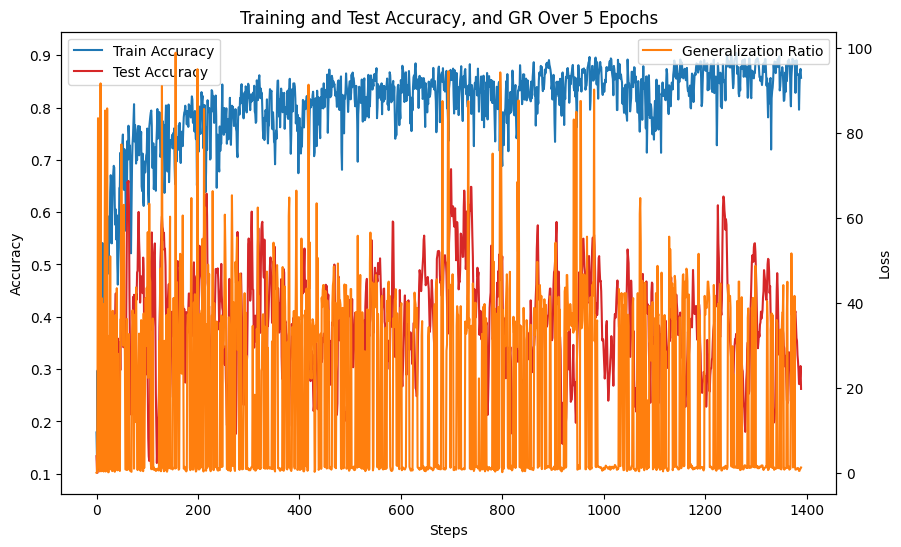

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Steps')
ax1.set_ylabel('Accuracy')
ax1.plot(a_train, label='Train Accuracy', color='tab:blue')
ax1.plot(a_test, label='Test Accuracy', color='tab:red')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Loss')
ax2.plot(Generalization_Ratio_, label='Generalization Ratio', color='tab:orange')
ax2.legend(loc='upper right')

plt.title('Training and Test Accuracy, and GR Over 5 Epochs')

# plt.savefig('/content/drive/MyDrive/Colab Notebooks/training_and_test_accuracy_and_GR.tif', format='tiff', dpi=1000)

plt.show()

### **Network1 : use only linear layers (not use GDP)**

In [ ]:
import argparse
import os
import numpy as np
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch

class LLNet(nn.Module):  # Use only linear layers
    def __init__(self):
        super(LLNet, self).__init__()

        self.fc1 = nn.Linear(3*28*28, 1000)  # First fully connected layer
        self.fc2 = nn.Linear(1000, 500)      # Second fully connected layer
        self.fc3 = nn.Linear(500, 100)       # Third fully connected layer
        self.fc4 = nn.Linear(100, 50)        # Fourth fully connected layer
        self.fc5 = nn.Linear(50, 25)         # Fifth fully connected layer
        self.fc6 = nn.Linear(25, 20)         # Sixth fully connected layer
        self.fc7 = nn.Linear(20, 10)         # Seventh fully connected layer (output layer)

    def forward(self, x):
        x = x.view(-1, 3*28*28)  # Flatten the input image
        x = self.fc1(x)  # Apply first fully connected layer
        x = self.fc2(x)  # Apply second fully connected layer
        x = self.fc3(x)  # Apply third fully connected layer
        x = self.fc4(x)  # Apply fourth fully connected layer
        x = self.fc5(x)  # Apply fifth fully connected layer
        x = self.fc6(x)  # Apply sixth fully connected layer
        x = self.fc7(x)  # Apply seventh fully connected layer (output)
        return x

loss_function = torch.nn.CrossEntropyLoss()  # Define the loss function
net = LLNet()  # Instantiate the network

# If a GPU is available, run everything in CUDA mode
if torch.cuda.is_available():
    net = net.cuda()  # Move the network to GPU
    loss_function = loss_function.cuda()  # Move the loss function to GPU

optimizer_L = torch.optim.Adam(net.parameters(), lr=0.001)  # Define the optimizer with a learning rate of 0.001

In [ ]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
from matplotlib import pyplot as plt
import random
import torch.optim as optim
import torchvision.transforms as transforms
import time
import torch.nn.functional as F
from collections import Counter, defaultdict
from itertools import combinations


a_train = []  # To store training accuracy
a_test = []  # To store test accuracy
lossaaa = []  # To store loss values
Inf = []  # To store information values
Var_all = []  # To store all variation values
Generalization_Ratio_ = []  # To store generalization ratios
dicide_action = []  # To store decision actions
loss_before = torch.tensor(30.0)  # Initial loss value
los = torch.tensor(30.0)  # Initial loss value
dis_before_A1 = torch.tensor(0)  # Distance before action A1
dis_before_A2 = torch.tensor(0)  # Distance before action A2
dis = torch.tensor(0.5)  # Distance increment
per = "N"  # Previous iteration's action
state_before = torch.tensor(0.0)  # Previous state value
categrary_number = 10  # Number of categories
tra_val_number = 2  # Training validation number

for epoch in range(10):  # Loop over the dataset multiple times
    e3412_iter = iter(e3412_loader)  # Iterator for e3412_loader
    running_loss = 0.0  # Running loss
    running_loss_all = 0.0  # Running loss for all
    loss_before = Variable(loss_before, requires_grad=False)  # Make loss_before a variable
    los = Variable(los, requires_grad=False)  # Make los a variable
    state_before = Variable(state_before, requires_grad=False)  # Make state_before a variable
    dis_before_A1 = Variable(dis_before_A1, requires_grad=False)  # Make dis_before_A1 a variable
    dis_before_A2 = Variable(dis_before_A2, requires_grad=False)  # Make dis_before_A2 a variable
    acc_A1 = Variable(dis_before_A1, requires_grad=False)  # Make acc_A1 a variable
    acc_A2 = Variable(dis_before_A2, requires_grad=False)  # Make acc_A2 a variable
    dis_ = Variable(dis, requires_grad=False)  # Make dis a variable

    for step, (imgs, labels) in enumerate(e1234_loader):  # Iterate over the data
        ### calculate losses
        weight_val_probility = 1.0 / tra_val_number  # Weight for validation probability
        labels = labels.cuda()  # Move labels to GPU
        imgs = imgs.cuda()  # Move images to GPU
        out_e1234 = net(imgs)  # Get output from the network
        loss_out_e1234 = loss_function(out_e1234, labels)  # Calculate loss for e1234 (A1)

        e3412_imgs, e3412_labels = next(e3412_iter)  # Get next batch from e3412_iter
        e3412_imgs = e3412_imgs.cuda()  # Move e3412 images to GPU
        e3412_labels = e3412_labels.cuda()  # Move e3412 labels to GPU
        out_e3412 = net(e3412_imgs)  # Get output from the network
        loss_out_e3412 = loss_function(out_e3412, e3412_labels)  # Calculate loss for e3412 (A3)

        #################### extract
        ## e1 ext count
        e12_extracted_loader_image = e12_extracted_loader_image.cuda()  # Move e12 extracted images to GPU
        e12_extracted_loader_label = e12_extracted_loader_label.cuda()  # Move e12 extracted labels to GPU
        e12_extracted_out = net(e12_extracted_loader_image).detach()  # Get detached output from the network
        e12_extracted = torch.max(e12_extracted_out, dim=1)[1]  # Get max output indices

        ## e2 ext count
        e34_extracted_loader_image = e34_extracted_loader_image.cuda()  # Move e34 extracted images to GPU
        e34_extracted_loader_label = e34_extracted_loader_label.cuda()  # Move e34 extracted labels to GPU
        e34_extracted_out = net(e34_extracted_loader_image).detach()  # Get detached output from the network
        e34_extracted = torch.max(e34_extracted_out, dim=1)[1]  # Get max output indices

        ########### e1 count
        e12_s_loader_image = e12_s_loader_image.cuda()  # Move e12 sample images to GPU
        e12_s_loader_label = e12_s_loader_label.cuda()  # Move e12 sample labels to GPU
        e12_inform_out = net(e12_s_loader_image).detach()  # Get detached output from the network
        e12_inform = torch.max(e12_inform_out, dim=1)[1]  # Get max output indices
        split_e12_inform = torch.chunk(e12_inform, 10)  # Split e12 inform into 10 chunks
        split_e12_inform = list(split_e12_inform)  # Convert split into list

        for i in range(len(split_e12_inform)):
            counts_E12 = torch.bincount(split_e12_inform[i], minlength=10)  # Count occurrences
            counts_e12 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e12[category] = counts_E12[category]  # Update counts
            split_e12_inform[i] = counts_e12  # Store updated counts

        ########### e2 count
        e34_s_loader_image = e34_s_loader_image.cuda()  # Move e34 sample images to GPU
        e34_s_loader_label = e34_s_loader_label.cuda()  # Move e34 sample labels to GPU
        e34_inform_out = net(e34_s_loader_image).detach()  # Get detached output from the network
        e34_inform = torch.max(e34_inform_out, dim=1)[1]  # Get max output indices
        split_e34_inform = torch.chunk(e34_inform, 10)  # Split e34 inform into 10 chunks
        split_e34_inform = list(split_e34_inform)  # Convert split into list

        for i in range(len(split_e34_inform)):
            counts_E34 = torch.bincount(split_e34_inform[i], minlength=10)  # Count occurrences
            counts_e34 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e34[category] = counts_E34[category]  # Update counts
            split_e34_inform[i] = counts_e34  # Store updated counts

        ##########
        ## IN_IN_pro
        counts_i_12 = torch.bincount(e12_inform, minlength=10)  # Count occurrences for e12 inform
        counts_i_34 = torch.bincount(e34_inform, minlength=10)  # Count occurrences for e34 inform
        counts_in_12 = torch.zeros(10)  # Initialize counts
        counts_in_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_in_12[category] = counts_i_12[category]  # Update counts for e12
        total_samples_in_12 = len(e12_inform)  # Total samples in e12

        for category in range(10):
            counts_in_34[category] = counts_i_34[category]  # Update counts for e34
        total_samples_in_34 = len(e34_inform)  # Total samples in e34

        min_denominator_in_12 = total_samples_in_12 * 1e-6  # Minimum denominator for e12
        probabilities_in_12 = counts_in_12 / (total_samples_in_12 + min_denominator_in_12)  # Probabilities for e12
        probabilities_tensor_in_12 = probabilities_in_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12

        min_denominator_in_34 = total_samples_in_34 * 1e-6  # Minimum denominator for e34
        probabilities_in_34 = counts_in_34 / (total_samples_in_34 + min_denominator_in_34)  # Probabilities for e34
        probabilities_tensor_in_34 = probabilities_in_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34

        counts_ext_12 = torch.bincount(e12_extracted, minlength=10)  # Count occurrences for e12 extracted
        counts_ext_34 = torch.bincount(e34_extracted, minlength=10)  # Count occurrences for e34 extracted
        counts_extra_12 = torch.zeros(10)  # Initialize counts
        counts_extra_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_extra_12[category] = counts_ext_12[category]  # Update counts for e12 extracted
        total_extracted_in_12 = len(e12_extracted)  # Total extracted samples in e12

        for category in range(10):
            counts_extra_34[category] = counts_ext_34[category]  # Update counts for e34 extracted
        total_extracted_in_34 = len(e34_extracted)  # Total extracted samples in e34

        min_denominator_ext_12 = total_extracted_in_12 * 1e-6  # Minimum denominator for e12 extracted
        probabilities_ext_12 = counts_extra_12 / (total_extracted_in_12 + min_denominator_ext_12)  # Probabilities for e12 extracted
        probabilities_tensor_extra_12 = probabilities_ext_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12 extracted

        min_denominator_ext_34 = total_extracted_in_34 * 1e-6  # Minimum denominator for e34 extracted
        probabilities_ext_34 = counts_extra_34 / (total_extracted_in_34 + min_denominator_ext_34)  # Probabilities for e34 extracted
        probabilities_tensor_extra_34 = probabilities_ext_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34 extracted

        ############################### Variation x ###################################
        in_12_all = probabilities_tensor_in_12
        in_34_all = probabilities_tensor_in_34
        in_12_extra = probabilities_tensor_extra_12
        in_34_extra = probabilities_tensor_extra_34
        weight_tra_probility_all = 1.0 / 2
        dow_all = \
              (in_12_all*weight_tra_probility_all + in_34_all*weight_tra_probility_all +
              in_12_extra*weight_tra_probility_all + in_34_extra*weight_tra_probility_all + 1e-30)
        in_1_all = (in_12_all*weight_tra_probility_all) / dow_all
        in_2_all = (in_34_all*weight_tra_probility_all) / dow_all
        e_1_all = (in_12_extra*weight_tra_probility_all) / dow_all
        e_2_all = (in_34_extra*weight_tra_probility_all) / dow_all
        in_1_all = in_1_all[0]
        in_2_all = in_2_all[0]
        e_1_all = e_1_all[0]
        e_2_all = e_2_all[0]
        d_KL_all = torch.zeros(10)
        k_divergence_all = (in_1_all + 1e-30) * torch.log(in_1_all / (e_1_all + 1e-30) + 1e-30)
        k_divergence_all_ = (in_1_all + 1e-30) * torch.log(in_1_all / (e_2_all + 1e-30) + 1e-30)
        d_KL_all = torch.max(abs(k_divergence_all))
        d_KL_all_ = torch.max(abs(k_divergence_all_))
        Variation_all = torch.max(d_KL_all, d_KL_all_)
        Var_all.append(Variation_all)

        ############################ Information ###################################
        all_combinations = list(combinations(range(10), 2))
        K = categrary_number * (categrary_number - 1)
        result_tensor = torch.zeros(len(all_combinations) * 2)  # Calculate the difference of each pair of combinations and store in result tensor
        for c in range(10):
            for idx, (i, j) in enumerate(all_combinations):
                s1 = abs(((split_e12_inform[c][i]/10) + 1e-30) * torch.log((split_e12_inform[c][i]/10) / ((split_e12_inform[c][j]/10) + 1e-30) + 1e-30))
                s3 = abs(((split_e34_inform[c][i]/10) + 1e-30) * torch.log((split_e34_inform[c][i]/10) / ((split_e34_inform[c][j]/10) + 1e-30) + 1e-30))
                min_value = torch.min(s1, s3)
                result_tensor[idx] = min_value.item()
                idx_ = idx + len(all_combinations)
                s1_ = abs(((split_e12_inform[c][j]/10) + 1e-30) * torch.log((split_e12_inform[c][j]/10) / ((split_e12_inform[c][i]/10) + 1e-30) + 1e-30))
                s3_ = abs(((split_e34_inform[c][j]/10) + 1e-30) * torch.log((split_e34_inform[c][j]/10) / ((split_e34_inform[c][i]/10) + 1e-30) + 1e-30))
                min_value_ = torch.min(s1_, s3_)
                result_tensor[idx_] = min_value_.item()
        Information = torch.sum(result_tensor) / K
        Inf.append(Information)

        ############################ Generalization_Ratio ###################################
        Generalization_Ratio = Variation_all * (Information + 1.0) / Information

        ############################ Generalization Decision Process (GDP) ###################################
        state_now = Generalization_Ratio
        loss_before = loss_before.cuda()
        state_before = state_before.cuda()
        state_dis = state_now - state_before
        result_tensor = torch.cat((loss_out_e1234.unsqueeze(0), loss_out_e3412.unsqueeze(0)), 0)

        # Because two datasets loss_out_e1234 and loss_out_e3412 are used, and there are actions A1 and A2,
        # choose one based on the reward
        if state_dis >= 0.0:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
        else:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"

        ####################################
        #### optimizer
        los = loss - loss_before
        ####################################
        loss = loss_out_e1234  # Losses from not using the selection
        ####################################
        state_before = state_now
        optimizer_L.zero_grad()
        loss.backward()
        optimizer_L.step()
        loss_before = loss
        running_loss += loss.item()

        # Print statistics
        if step % 5 == 4:  # Print every 500 mini-batches
            with torch.no_grad():  # 'with' is a context manager
                s_test_image = s_test_image.cuda()
                s_test_label = s_test_label.cuda()
                s_tra_image = s_tra_image.cuda()
                s_tra_label = s_tra_label.cuda()
                outputs = net(s_test_image)  # [batch, 10]
                predict_y = torch.max(outputs, dim=1)[1]
                accuracy = torch.eq(predict_y, s_test_label).sum().item() / s_test_label.size(0)
                a_test.append(float(accuracy))
                outputs_t = net(s_tra_image)  # [batch, 10]
                predict_y_t = torch.max(outputs_t, dim=1)[1]
                accuracy_t = torch.eq(predict_y_t, s_tra_label).sum().item() / s_tra_label.size(0)
                a_train.append(float(accuracy_t))
                Generalization_Ratio_.append(Generalization_Ratio)
                lossaaa.append(float(running_loss / 5))
                print('[%d, %5d] train_loss: %.3f train_accuracy: %.3f test_accuracy: %.3f' %
                      (epoch + 1, step + 1, running_loss / 5, accuracy_t, accuracy))
                running_loss = 0.0
                running_loss = 0.0

[1,     5] train_loss: 2.480 train_accuracy: 0.159 test_accuracy: 0.095
[1,    10] train_loss: 2.461 train_accuracy: 0.186 test_accuracy: 0.207
[1,    15] train_loss: 1.985 train_accuracy: 0.345 test_accuracy: 0.113
[1,    20] train_loss: 2.139 train_accuracy: 0.241 test_accuracy: 0.152
[1,    25] train_loss: 2.456 train_accuracy: 0.261 test_accuracy: 0.197
[1,    30] train_loss: 1.606 train_accuracy: 0.295 test_accuracy: 0.100
[1,    35] train_loss: 2.257 train_accuracy: 0.320 test_accuracy: 0.313
[1,    40] train_loss: 1.740 train_accuracy: 0.465 test_accuracy: 0.359
[1,    45] train_loss: 1.708 train_accuracy: 0.364 test_accuracy: 0.283
[1,    50] train_loss: 2.109 train_accuracy: 0.293 test_accuracy: 0.289
[1,    55] train_loss: 1.413 train_accuracy: 0.491 test_accuracy: 0.311
[1,    60] train_loss: 1.451 train_accuracy: 0.531 test_accuracy: 0.417
[1,    65] train_loss: 1.802 train_accuracy: 0.291 test_accuracy: 0.360
[1,    70] train_loss: 1.838 train_accuracy: 0.560 test_accuracy

In [ ]:
# Writing training accuracy to file
with open('Accuracy_a_train.txt', 'w') as file:
    for i in range(len(a_train)):
        file.write(str(a_train[i]))
        if i < len(a_train) - 1:
            file.write(', ')

# Writing test accuracy to file
with open('Accuracy_a_test.txt', 'w') as file:
    for i in range(len(a_test)):
        file.write(str(a_test[i]))
        if i < len(a_test) - 1:
            file.write(', ')

# Writing loss values to file
with open('Accuracy_loss.txt', 'w') as file:
    for i in range(len(lossaaa)):
        file.write(str(lossaaa[i]))
        if i < len(lossaaa) - 1:
            file.write(', ')

In [ ]:
# Convert tensors to lists
Inf_list = [tensor.item() for tensor in Inf]
Var_av_list = [tensor.item() for tensor in Var_all]
Generalization_Ratio_list = [tensor.item() for tensor in Generalization_Ratio_]

# Writing Inf_list to file
with open('Inf_OOD.txt', 'w') as file:
    for i in range(len(Inf_list)):
        file.write(str(Inf_list[i]))
        if i < len(Inf_list) - 1:
            file.write(', ')

# Writing Var_av_list to file
with open('Var_all_OOD.txt', 'w') as file:
    for i in range(len(Var_av_list)):
        file.write(str(Var_av_list[i]))
        if i < len(Var_av_list) - 1:
            file.write(', ')

# Writing Generalization_Ratio_list to file
with open('Generalization_Ratio_list.txt', 'w') as file:
    for i in range(len(Generalization_Ratio_list)):
        file.write(str(Generalization_Ratio_list[i]))
        if i < len(Generalization_Ratio_list) - 1:
            file.write(', ')

In [ ]:
import time
import os  # Import the os module

os.makedirs(os.path.join('./Models/'), exist_ok=True)  # Create the directory './Models/' if it doesn't exist
model_path = './Models/'  # Define the model path

rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))  # Get the current time in the format 'YYYYMMDDHHMM'

# Save the training results
current_model_path = model_path + rq + "_model.pkl"  # Create the full path for the model file with the current timestamp
torch.save(net, current_model_path)  # Save the model to the specified path
print("Saved model file: " + current_model_path)  # Print the path of the saved model file

Saved model file: ./Models/202408060949_model.pkl


In [ ]:
# Display the highest value that appears during training
print("train:", max(a_train))  # Print the highest value in the training data
print("test:", max(a_test))  # Print the highest value in the test data
print("loss:", min(lossaaa))  # Print the minimum value of the loss

train: 0.902710027100271
test: 0.6242018850714502
loss: 0.06508782729506493


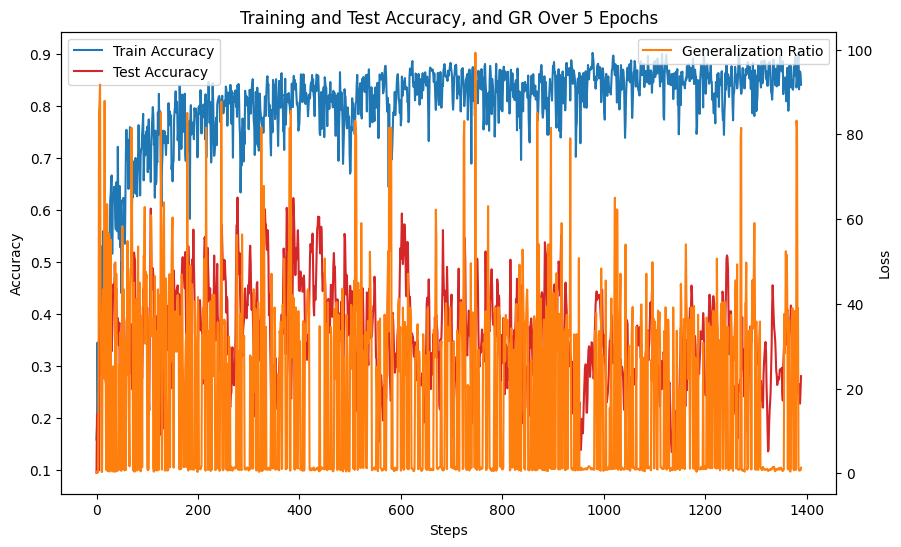

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Steps')
ax1.set_ylabel('Accuracy')
ax1.plot(a_train, label='Train Accuracy', color='tab:blue')
ax1.plot(a_test, label='Test Accuracy', color='tab:red')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Loss')
ax2.plot(Generalization_Ratio_, label='Generalization Ratio', color='tab:orange')
ax2.legend(loc='upper right')

plt.title('Training and Test Accuracy, and GR Over 5 Epochs')

# plt.savefig('/content/drive/MyDrive/Colab Notebooks/training_and_test_accuracy_and_GR.tif', format='tiff', dpi=1000)

plt.show()

### **Network2 : use linear layers and active layers + Generalization Decision Process (GDP)**

In [ ]:
import argparse
import os
import numpy as np
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch

class LANet(nn.Module):
    def __init__(self):  # Initialization function
        super(LANet, self).__init__()

        self.fc1 = nn.Linear(3*28*28, 1000)  # Define the first fully connected layer
        self.fc2 = nn.Linear(1000, 500)  # Define the second fully connected layer
        self.fc3 = nn.Linear(500, 100)  # Define the third fully connected layer
        self.fc4 = nn.Linear(100, 50)  # Define the fourth fully connected layer
        self.fc5 = nn.Linear(50, 10)  # Define the fifth fully connected layer

    def forward(self, x):  # Define the forward pass

        x = x.view(-1, 3*28*28)  # Flatten the input tensor
        x = self.fc1(x)  # Apply  the first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation after the second layer
        x = self.fc3(x)  # Apply the third layer
        x = F.relu(self.fc4(x))  # Apply ReLU activation after the fourth layer
        x = self.fc5(x)  # Apply the fifth layer
        return x  # Return the output

loss_function = torch.nn.CrossEntropyLoss()  # Define the loss function as CrossEntropyLoss
net = LANet()  # Instantiate the LANet model
# If a GPU is available, run in CUDA mode
if torch.cuda.is_available():
    net = net.cuda()  # Move the network to the GPU
    loss_function = loss_function.cuda()  # Move the loss function to the GPU
optimizer_L = torch.optim.Adam(net.parameters(), lr=0.001)  # Initialize the Adam optimizer with learning rate 0.001

In [ ]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
from matplotlib import pyplot as plt
import random
import torch.optim as optim
import torchvision.transforms as transforms
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter, defaultdict
from itertools import combinations
import random

a_train = []  # To store training accuracy
a_test = []  # To store test accuracy
lossaaa = []  # To store loss values
Inf = []  # To store information values
Var_all = []  # To store all variation values
Generalization_Ratio_ = []  # To store generalization ratios
dicide_action = []  # To store decision actions
loss_before = torch.tensor(30.0)  # Initial loss value
los = torch.tensor(30.0)  # Initial loss value
dis_before_A1 = torch.tensor(0)  # Distance before action A1
dis_before_A2 = torch.tensor(0)  # Distance before action A2
dis = torch.tensor(0.5)  # Distance increment
per = "N"  # Previous iteration's action
state_before = torch.tensor(0.0)  # Previous state value
categrary_number = 10  # Number of categories
tra_val_number = 2  # Training validation number

for epoch in range(10):  # Loop over the dataset multiple times
    e3412_iter = iter(e3412_loader)  # Iterator for e3412_loader
    running_loss = 0.0  # Running loss
    running_loss_all = 0.0  # Running loss for all
    loss_before = Variable(loss_before, requires_grad=False)  # Make loss_before a variable
    los = Variable(los, requires_grad=False)  # Make los a variable
    state_before = Variable(state_before, requires_grad=False)  # Make state_before a variable
    dis_before_A1 = Variable(dis_before_A1, requires_grad=False)  # Make dis_before_A1 a variable
    dis_before_A2 = Variable(dis_before_A2, requires_grad=False)  # Make dis_before_A2 a variable
    acc_A1 = Variable(dis_before_A1, requires_grad=False)  # Make acc_A1 a variable
    acc_A2 = Variable(dis_before_A2, requires_grad=False)  # Make acc_A2 a variable
    dis_ = Variable(dis, requires_grad=False)  # Make dis a variable

    for step, (imgs, labels) in enumerate(e1234_loader):  # Iterate over the data
        ### calculate losses
        weight_val_probility = 1.0 / tra_val_number  # Weight for validation probability
        labels = labels.cuda()  # Move labels to GPU
        imgs = imgs.cuda()  # Move images to GPU
        out_e1234 = net(imgs)  # Get output from the network
        loss_out_e1234 = loss_function(out_e1234, labels)  # Calculate loss for e1234 (A1)

        e3412_imgs, e3412_labels = next(e3412_iter)  # Get next batch from e3412_iter
        e3412_imgs = e3412_imgs.cuda()  # Move e3412 images to GPU
        e3412_labels = e3412_labels.cuda()  # Move e3412 labels to GPU
        out_e3412 = net(e3412_imgs)  # Get output from the network
        loss_out_e3412 = loss_function(out_e3412, e3412_labels)  # Calculate loss for e3412 (A3)

        #################### extract
        ## e1 ext count
        e12_extracted_loader_image = e12_extracted_loader_image.cuda()  # Move e12 extracted images to GPU
        e12_extracted_loader_label = e12_extracted_loader_label.cuda()  # Move e12 extracted labels to GPU
        e12_extracted_out = net(e12_extracted_loader_image).detach()  # Get detached output from the network
        e12_extracted = torch.max(e12_extracted_out, dim=1)[1]  # Get max output indices

        ## e2 ext count
        e34_extracted_loader_image = e34_extracted_loader_image.cuda()  # Move e34 extracted images to GPU
        e34_extracted_loader_label = e34_extracted_loader_label.cuda()  # Move e34 extracted labels to GPU
        e34_extracted_out = net(e34_extracted_loader_image).detach()  # Get detached output from the network
        e34_extracted = torch.max(e34_extracted_out, dim=1)[1]  # Get max output indices

        ########### e1 count
        e12_s_loader_image = e12_s_loader_image.cuda()  # Move e12 sample images to GPU
        e12_s_loader_label = e12_s_loader_label.cuda()  # Move e12 sample labels to GPU
        e12_inform_out = net(e12_s_loader_image).detach()  # Get detached output from the network
        e12_inform = torch.max(e12_inform_out, dim=1)[1]  # Get max output indices
        split_e12_inform = torch.chunk(e12_inform, 10)  # Split e12 inform into 10 chunks
        split_e12_inform = list(split_e12_inform)  # Convert split into list

        for i in range(len(split_e12_inform)):
            counts_E12 = torch.bincount(split_e12_inform[i], minlength=10)  # Count occurrences
            counts_e12 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e12[category] = counts_E12[category]  # Update counts
            split_e12_inform[i] = counts_e12  # Store updated counts

        ########### e2 count
        e34_s_loader_image = e34_s_loader_image.cuda()  # Move e34 sample images to GPU
        e34_s_loader_label = e34_s_loader_label.cuda()  # Move e34 sample labels to GPU
        e34_inform_out = net(e34_s_loader_image).detach()  # Get detached output from the network
        e34_inform = torch.max(e34_inform_out, dim=1)[1]  # Get max output indices
        split_e34_inform = torch.chunk(e34_inform, 10)  # Split e34 inform into 10 chunks
        split_e34_inform = list(split_e34_inform)  # Convert split into list

        for i in range(len(split_e34_inform)):
            counts_E34 = torch.bincount(split_e34_inform[i], minlength=10)  # Count occurrences
            counts_e34 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e34[category] = counts_E34[category]  # Update counts
            split_e34_inform[i] = counts_e34  # Store updated counts

        ##########
        ## IN_IN_pro
        counts_i_12 = torch.bincount(e12_inform, minlength=10)  # Count occurrences for e12 inform
        counts_i_34 = torch.bincount(e34_inform, minlength=10)  # Count occurrences for e34 inform
        counts_in_12 = torch.zeros(10)  # Initialize counts
        counts_in_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_in_12[category] = counts_i_12[category]  # Update counts for e12
        total_samples_in_12 = len(e12_inform)  # Total samples in e12

        for category in range(10):
            counts_in_34[category] = counts_i_34[category]  # Update counts for e34
        total_samples_in_34 = len(e34_inform)  # Total samples in e34

        min_denominator_in_12 = total_samples_in_12 * 1e-6  # Minimum denominator for e12
        probabilities_in_12 = counts_in_12 / (total_samples_in_12 + min_denominator_in_12)  # Probabilities for e12
        probabilities_tensor_in_12 = probabilities_in_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12

        min_denominator_in_34 = total_samples_in_34 * 1e-6  # Minimum denominator for e34
        probabilities_in_34 = counts_in_34 / (total_samples_in_34 + min_denominator_in_34)  # Probabilities for e34
        probabilities_tensor_in_34 = probabilities_in_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34

        counts_ext_12 = torch.bincount(e12_extracted, minlength=10)  # Count occurrences for e12 extracted
        counts_ext_34 = torch.bincount(e34_extracted, minlength=10)  # Count occurrences for e34 extracted
        counts_extra_12 = torch.zeros(10)  # Initialize counts
        counts_extra_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_extra_12[category] = counts_ext_12[category]  # Update counts for e12 extracted
        total_extracted_in_12 = len(e12_extracted)  # Total extracted samples in e12

        for category in range(10):
            counts_extra_34[category] = counts_ext_34[category]  # Update counts for e34 extracted
        total_extracted_in_34 = len(e34_extracted)  # Total extracted samples in e34

        min_denominator_ext_12 = total_extracted_in_12 * 1e-6  # Minimum denominator for e12 extracted
        probabilities_ext_12 = counts_extra_12 / (total_extracted_in_12 + min_denominator_ext_12)  # Probabilities for e12 extracted
        probabilities_tensor_extra_12 = probabilities_ext_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12 extracted

        min_denominator_ext_34 = total_extracted_in_34 * 1e-6  # Minimum denominator for e34 extracted
        probabilities_ext_34 = counts_extra_34 / (total_extracted_in_34 + min_denominator_ext_34)  # Probabilities for e34 extracted
        probabilities_tensor_extra_34 = probabilities_ext_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34 extracted

        ############################### Variation x ###################################
        in_12_all = probabilities_tensor_in_12
        in_34_all = probabilities_tensor_in_34
        in_12_extra = probabilities_tensor_extra_12
        in_34_extra = probabilities_tensor_extra_34
        weight_tra_probility_all = 1.0 / 2
        dow_all = \
              (in_12_all*weight_tra_probility_all + in_34_all*weight_tra_probility_all +
              in_12_extra*weight_tra_probility_all + in_34_extra*weight_tra_probility_all + 1e-30)
        in_1_all = (in_12_all*weight_tra_probility_all) / dow_all
        in_2_all = (in_34_all*weight_tra_probility_all) / dow_all
        e_1_all = (in_12_extra*weight_tra_probility_all) / dow_all
        e_2_all = (in_34_extra*weight_tra_probility_all) / dow_all
        in_1_all = in_1_all[0]
        in_2_all = in_2_all[0]
        e_1_all = e_1_all[0]
        e_2_all = e_2_all[0]
        d_KL_all = torch.zeros(10)
        k_divergence_all = (in_1_all + 1e-30) * torch.log(in_1_all / (e_1_all + 1e-30) + 1e-30)
        k_divergence_all_ = (in_1_all + 1e-30) * torch.log(in_1_all / (e_2_all + 1e-30) + 1e-30)
        d_KL_all = torch.max(abs(k_divergence_all))
        d_KL_all_ = torch.max(abs(k_divergence_all_))
        Variation_all = torch.max(d_KL_all, d_KL_all_)
        Var_all.append(Variation_all)

        ############################ Information ###################################
        all_combinations = list(combinations(range(10), 2))
        K = categrary_number * (categrary_number - 1)
        result_tensor = torch.zeros(len(all_combinations) * 2)  # Calculate the difference of each pair of combinations and store in result tensor
        for c in range(10):
            for idx, (i, j) in enumerate(all_combinations):
                s1 = abs(((split_e12_inform[c][i]/10) + 1e-30) * torch.log((split_e12_inform[c][i]/10) / ((split_e12_inform[c][j]/10) + 1e-30) + 1e-30))
                s3 = abs(((split_e34_inform[c][i]/10) + 1e-30) * torch.log((split_e34_inform[c][i]/10) / ((split_e34_inform[c][j]/10) + 1e-30) + 1e-30))
                min_value = torch.min(s1, s3)
                result_tensor[idx] = min_value.item()
                idx_ = idx + len(all_combinations)
                s1_ = abs(((split_e12_inform[c][j]/10) + 1e-30) * torch.log((split_e12_inform[c][j]/10) / ((split_e12_inform[c][i]/10) + 1e-30) + 1e-30))
                s3_ = abs(((split_e34_inform[c][j]/10) + 1e-30) * torch.log((split_e34_inform[c][j]/10) / ((split_e34_inform[c][i]/10) + 1e-30) + 1e-30))
                min_value_ = torch.min(s1_, s3_)
                result_tensor[idx_] = min_value_.item()
        Information = torch.sum(result_tensor) / K
        Inf.append(Information)

        ############################ Generalization_Ratio ###################################
        Generalization_Ratio = Variation_all * (Information + 1.0) / Information

        ############################ Generalization Decision Process (GDP) ###################################
        state_now = Generalization_Ratio
        loss_before = loss_before.cuda()
        state_before = state_before.cuda()
        state_dis = state_now - state_before
        result_tensor = torch.cat((loss_out_e1234.unsqueeze(0), loss_out_e3412.unsqueeze(0)), 0)

        # Because two datasets loss_out_e1234 and loss_out_e3412 are used, and there are actions A1 and A2,
        # choose one based on the reward
        if state_dis >= 0.0:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
        else:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"

        ####################################
        #### optimizer
        los = loss - loss_before
        state_before = state_now
        optimizer_L.zero_grad()
        loss.backward()
        optimizer_L.step()
        loss_before = loss
        running_loss += loss.item()

        # Print statistics
        if step % 5 == 4:  # Print every 500 mini-batches
            with torch.no_grad():  # 'with' is a context manager
                s_test_image = s_test_image.cuda()
                s_test_label = s_test_label.cuda()
                s_tra_image = s_tra_image.cuda()
                s_tra_label = s_tra_label.cuda()
                outputs = net(s_test_image)  # [batch, 10]
                predict_y = torch.max(outputs, dim=1)[1]
                accuracy = torch.eq(predict_y, s_test_label).sum().item() / s_test_label.size(0)
                a_test.append(float(accuracy))
                outputs_t = net(s_tra_image)  # [batch, 10]
                predict_y_t = torch.max(outputs_t, dim=1)[1]
                accuracy_t = torch.eq(predict_y_t, s_tra_label).sum().item() / s_tra_label.size(0)
                a_train.append(float(accuracy_t))
                lossaaa.append(float(running_loss / 5))
                Generalization_Ratio_.append(Generalization_Ratio)
                print('[%d, %5d] train_loss: %.3f train_accuracy: %.3f test_accuracy: %.3f' %
                      (epoch + 1, step + 1, running_loss / 5, accuracy_t, accuracy))
                running_loss = 0.0
                running_loss = 0.0

[1,     5] train_loss: 2.426 train_accuracy: 0.159 test_accuracy: 0.101
[1,    10] train_loss: 2.296 train_accuracy: 0.144 test_accuracy: 0.099
[1,    15] train_loss: 2.376 train_accuracy: 0.223 test_accuracy: 0.108
[1,    20] train_loss: 2.231 train_accuracy: 0.172 test_accuracy: 0.099
[1,    25] train_loss: 2.148 train_accuracy: 0.166 test_accuracy: 0.109
[1,    30] train_loss: 2.040 train_accuracy: 0.266 test_accuracy: 0.167
[1,    35] train_loss: 2.146 train_accuracy: 0.230 test_accuracy: 0.183
[1,    40] train_loss: 2.243 train_accuracy: 0.222 test_accuracy: 0.223
[1,    45] train_loss: 2.144 train_accuracy: 0.301 test_accuracy: 0.192
[1,    50] train_loss: 1.894 train_accuracy: 0.307 test_accuracy: 0.189
[1,    55] train_loss: 2.098 train_accuracy: 0.387 test_accuracy: 0.224
[1,    60] train_loss: 1.265 train_accuracy: 0.364 test_accuracy: 0.214
[1,    65] train_loss: 2.075 train_accuracy: 0.452 test_accuracy: 0.337
[1,    70] train_loss: 2.272 train_accuracy: 0.442 test_accuracy

In [ ]:
# Writing training accuracy to file
with open('Accuracy_a_train.txt', 'w') as file:
    for i in range(len(a_train)):
        file.write(str(a_train[i]))
        if i < len(a_train) - 1:
            file.write(', ')

# Writing test accuracy to file
with open('Accuracy_a_test.txt', 'w') as file:
    for i in range(len(a_test)):
        file.write(str(a_test[i]))
        if i < len(a_test) - 1:
            file.write(', ')

# Writing loss values to file
with open('Accuracy_loss.txt', 'w') as file:
    for i in range(len(lossaaa)):
        file.write(str(lossaaa[i]))
        if i < len(lossaaa) - 1:
            file.write(', ')

In [ ]:
# Convert tensors to lists
Inf_list = [tensor.item() for tensor in Inf]
Var_av_list = [tensor.item() for tensor in Var_all]
Generalization_Ratio_list = [tensor.item() for tensor in Generalization_Ratio_]

# Writing Inf_list to file
with open('Inf_OOD.txt', 'w') as file:
    for i in range(len(Inf_list)):
        file.write(str(Inf_list[i]))
        if i < len(Inf_list) - 1:
            file.write(', ')

# Writing Var_av_list to file
with open('Var_all_OOD.txt', 'w') as file:
    for i in range(len(Var_av_list)):
        file.write(str(Var_av_list[i]))
        if i < len(Var_av_list) - 1:
            file.write(', ')

# Writing Generalization_Ratio_list to file
with open('Generalization_Ratio_list.txt', 'w') as file:
    for i in range(len(Generalization_Ratio_list)):
        file.write(str(Generalization_Ratio_list[i]))
        if i < len(Generalization_Ratio_list) - 1:
            file.write(', ')

In [39]:
import time
import os  # Import the os module

os.makedirs(os.path.join('./Models/'), exist_ok=True)  # Create the directory './Models/' if it doesn't exist
model_path = './Models/'  # Define the model path

rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))  # Get the current time in the format 'YYYYMMDDHHMM'

# Save the training results
current_model_path = model_path + rq + "_model.pkl"  # Create the full path for the model file with the current timestamp
torch.save(net, current_model_path)  # Save the model to the specified path
print("Saved model file: " + current_model_path)  # Print the path of the saved model file

Saved model file: ./Models/202408061111_model.pkl


In [37]:
# Display the highest value that appears during training
print("train:", max(a_train))  # Print the highest value in the training data
print("test:", max(a_test))  # Print the highest value in the test data
print("loss:", min(lossaaa))  # Print the minimum value of the loss

train: 0.9056910569105691
test: 0.649741562785041
loss: 0.03221881305798888


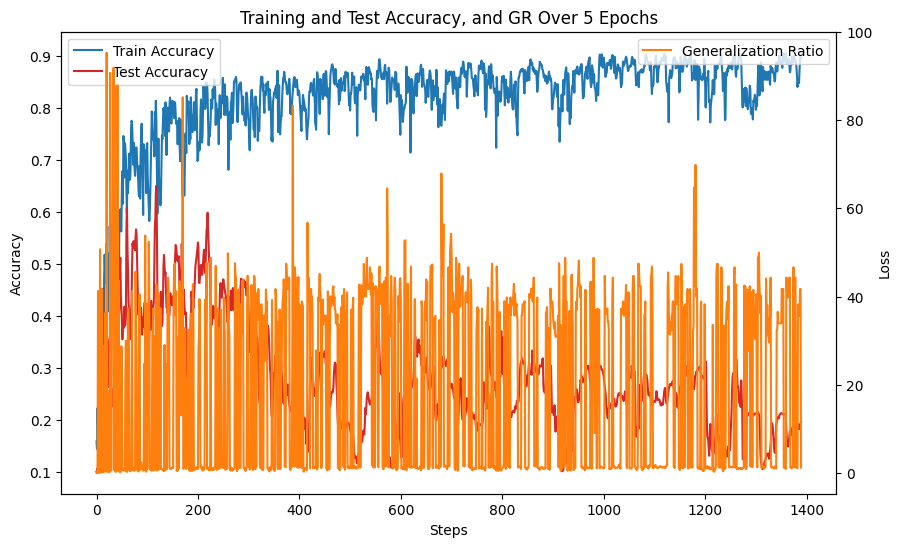

In [38]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Steps')
ax1.set_ylabel('Accuracy')
ax1.plot(a_train, label='Train Accuracy', color='tab:blue')
ax1.plot(a_test, label='Test Accuracy', color='tab:red')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Loss')
ax2.plot(Generalization_Ratio_, label='Generalization Ratio', color='tab:orange')
ax2.legend(loc='upper right')

plt.title('Training and Test Accuracy, and GR Over 5 Epochs')

# plt.savefig('/content/drive/MyDrive/Colab Notebooks/training_and_test_accuracy_and_GR.tif', format='tiff', dpi=1000)

plt.show()

### **Network2 : use linear layers and active layers (not use GDP)**

In [ ]:
import argparse
import os
import numpy as np
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch

class LANet(nn.Module):
    def __init__(self):  # Initialization function
        super(LANet, self).__init__()

        self.fc1 = nn.Linear(3*28*28, 1000)  # Define the first fully connected layer
        self.fc2 = nn.Linear(1000, 500)  # Define the second fully connected layer
        self.fc3 = nn.Linear(500, 100)  # Define the third fully connected layer
        self.fc4 = nn.Linear(100, 50)  # Define the fourth fully connected layer
        self.fc5 = nn.Linear(50, 10)  # Define the fifth fully connected layer

    def forward(self, x):  # Define the forward pass

        x = x.view(-1, 3*28*28)  # Flatten the input tensor
        x = self.fc1(x)  # Apply  the first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation after the second layer
        x = self.fc3(x)  # Apply the third layer
        x = F.relu(self.fc4(x))  # Apply ReLU activation after the fourth layer
        x = self.fc5(x)  # Apply the fifth layer
        return x  # Return the output

loss_function = torch.nn.CrossEntropyLoss()  # Define the loss function as CrossEntropyLoss
net = LANet()  # Instantiate the LANet model
# If a GPU is available, run in CUDA mode
if torch.cuda.is_available():
    net = net.cuda()  # Move the network to the GPU
    loss_function = loss_function.cuda()  # Move the loss function to the GPU
optimizer_L = torch.optim.Adam(net.parameters(), lr=0.001)  # Initialize the Adam optimizer with learning rate 0.001

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter, defaultdict
from itertools import combinations
import random

a_train = []  # To store training accuracy
a_test = []  # To store test accuracy
lossaaa = []  # To store loss values
Inf = []  # To store information values
Var_all = []  # To store all variation values
Generalization_Ratio_ = []  # To store generalization ratios
dicide_action = []  # To store decision actions
loss_before = torch.tensor(30.0)  # Initial loss value
los = torch.tensor(30.0)  # Initial loss value
dis_before_A1 = torch.tensor(0)  # Distance before action A1
dis_before_A2 = torch.tensor(0)  # Distance before action A2
dis = torch.tensor(0.5)  # Distance increment
per = "N"  # Previous iteration's action
state_before = torch.tensor(0.0)  # Previous state value
categrary_number = 10  # Number of categories
tra_val_number = 2  # Training validation number

for epoch in range(10):  # Loop over the dataset multiple times
    e3412_iter = iter(e3412_loader)  # Iterator for e3412_loader
    running_loss = 0.0  # Running loss
    running_loss_all = 0.0  # Running loss for all
    loss_before = Variable(loss_before, requires_grad=False)  # Make loss_before a variable
    los = Variable(los, requires_grad=False)  # Make los a variable
    state_before = Variable(state_before, requires_grad=False)  # Make state_before a variable
    dis_before_A1 = Variable(dis_before_A1, requires_grad=False)  # Make dis_before_A1 a variable
    dis_before_A2 = Variable(dis_before_A2, requires_grad=False)  # Make dis_before_A2 a variable
    acc_A1 = Variable(dis_before_A1, requires_grad=False)  # Make acc_A1 a variable
    acc_A2 = Variable(dis_before_A2, requires_grad=False)  # Make acc_A2 a variable
    dis_ = Variable(dis, requires_grad=False)  # Make dis a variable

    for step, (imgs, labels) in enumerate(e1234_loader):  # Iterate over the data
        ### calculate losses
        weight_val_probility = 1.0 / tra_val_number  # Weight for validation probability
        labels = labels.cuda()  # Move labels to GPU
        imgs = imgs.cuda()  # Move images to GPU
        out_e1234 = net(imgs)  # Get output from the network
        loss_out_e1234 = loss_function(out_e1234, labels)  # Calculate loss for e1234 (A1)

        e3412_imgs, e3412_labels = next(e3412_iter)  # Get next batch from e3412_iter
        e3412_imgs = e3412_imgs.cuda()  # Move e3412 images to GPU
        e3412_labels = e3412_labels.cuda()  # Move e3412 labels to GPU
        out_e3412 = net(e3412_imgs)  # Get output from the network
        loss_out_e3412 = loss_function(out_e3412, e3412_labels)  # Calculate loss for e3412 (A3)

        #################### extract
        ## e1 ext count
        e12_extracted_loader_image = e12_extracted_loader_image.cuda()  # Move e12 extracted images to GPU
        e12_extracted_loader_label = e12_extracted_loader_label.cuda()  # Move e12 extracted labels to GPU
        e12_extracted_out = net(e12_extracted_loader_image).detach()  # Get detached output from the network
        e12_extracted = torch.max(e12_extracted_out, dim=1)[1]  # Get max output indices

        ## e2 ext count
        e34_extracted_loader_image = e34_extracted_loader_image.cuda()  # Move e34 extracted images to GPU
        e34_extracted_loader_label = e34_extracted_loader_label.cuda()  # Move e34 extracted labels to GPU
        e34_extracted_out = net(e34_extracted_loader_image).detach()  # Get detached output from the network
        e34_extracted = torch.max(e34_extracted_out, dim=1)[1]  # Get max output indices

        ########### e1 count
        e12_s_loader_image = e12_s_loader_image.cuda()  # Move e12 sample images to GPU
        e12_s_loader_label = e12_s_loader_label.cuda()  # Move e12 sample labels to GPU
        e12_inform_out = net(e12_s_loader_image).detach()  # Get detached output from the network
        e12_inform = torch.max(e12_inform_out, dim=1)[1]  # Get max output indices
        split_e12_inform = torch.chunk(e12_inform, 10)  # Split e12 inform into 10 chunks
        split_e12_inform = list(split_e12_inform)  # Convert split into list

        for i in range(len(split_e12_inform)):
            counts_E12 = torch.bincount(split_e12_inform[i], minlength=10)  # Count occurrences
            counts_e12 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e12[category] = counts_E12[category]  # Update counts
            split_e12_inform[i] = counts_e12  # Store updated counts

        ########### e2 count
        e34_s_loader_image = e34_s_loader_image.cuda()  # Move e34 sample images to GPU
        e34_s_loader_label = e34_s_loader_label.cuda()  # Move e34 sample labels to GPU
        e34_inform_out = net(e34_s_loader_image).detach()  # Get detached output from the network
        e34_inform = torch.max(e34_inform_out, dim=1)[1]  # Get max output indices
        split_e34_inform = torch.chunk(e34_inform, 10)  # Split e34 inform into 10 chunks
        split_e34_inform = list(split_e34_inform)  # Convert split into list

        for i in range(len(split_e34_inform)):
            counts_E34 = torch.bincount(split_e34_inform[i], minlength=10)  # Count occurrences
            counts_e34 = torch.zeros(10)  # Initialize counts
            for category in range(10):
                counts_e34[category] = counts_E34[category]  # Update counts
            split_e34_inform[i] = counts_e34  # Store updated counts

        ##########
        ## IN_IN_pro
        counts_i_12 = torch.bincount(e12_inform, minlength=10)  # Count occurrences for e12 inform
        counts_i_34 = torch.bincount(e34_inform, minlength=10)  # Count occurrences for e34 inform
        counts_in_12 = torch.zeros(10)  # Initialize counts
        counts_in_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_in_12[category] = counts_i_12[category]  # Update counts for e12
        total_samples_in_12 = len(e12_inform)  # Total samples in e12

        for category in range(10):
            counts_in_34[category] = counts_i_34[category]  # Update counts for e34
        total_samples_in_34 = len(e34_inform)  # Total samples in e34

        min_denominator_in_12 = total_samples_in_12 * 1e-6  # Minimum denominator for e12
        probabilities_in_12 = counts_in_12 / (total_samples_in_12 + min_denominator_in_12)  # Probabilities for e12
        probabilities_tensor_in_12 = probabilities_in_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12

        min_denominator_in_34 = total_samples_in_34 * 1e-6  # Minimum denominator for e34
        probabilities_in_34 = counts_in_34 / (total_samples_in_34 + min_denominator_in_34)  # Probabilities for e34
        probabilities_tensor_in_34 = probabilities_in_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34

        counts_ext_12 = torch.bincount(e12_extracted, minlength=10)  # Count occurrences for e12 extracted
        counts_ext_34 = torch.bincount(e34_extracted, minlength=10)  # Count occurrences for e34 extracted
        counts_extra_12 = torch.zeros(10)  # Initialize counts
        counts_extra_34 = torch.zeros(10)  # Initialize counts

        for category in range(10):
            counts_extra_12[category] = counts_ext_12[category]  # Update counts for e12 extracted
        total_extracted_in_12 = len(e12_extracted)  # Total extracted samples in e12

        for category in range(10):
            counts_extra_34[category] = counts_ext_34[category]  # Update counts for e34 extracted
        total_extracted_in_34 = len(e34_extracted)  # Total extracted samples in e34

        min_denominator_ext_12 = total_extracted_in_12 * 1e-6  # Minimum denominator for e12 extracted
        probabilities_ext_12 = counts_extra_12 / (total_extracted_in_12 + min_denominator_ext_12)  # Probabilities for e12 extracted
        probabilities_tensor_extra_12 = probabilities_ext_12.unsqueeze(0)  # Unsqueeze probabilities tensor for e12 extracted

        min_denominator_ext_34 = total_extracted_in_34 * 1e-6  # Minimum denominator for e34 extracted
        probabilities_ext_34 = counts_extra_34 / (total_extracted_in_34 + min_denominator_ext_34)  # Probabilities for e34 extracted
        probabilities_tensor_extra_34 = probabilities_ext_34.unsqueeze(0)  # Unsqueeze probabilities tensor for e34 extracted

        ############################### Variation x ###################################
        in_12_all = probabilities_tensor_in_12
        in_34_all = probabilities_tensor_in_34
        in_12_extra = probabilities_tensor_extra_12
        in_34_extra = probabilities_tensor_extra_34
        weight_tra_probility_all = 1.0 / 2
        dow_all = \
              (in_12_all*weight_tra_probility_all + in_34_all*weight_tra_probility_all +
              in_12_extra*weight_tra_probility_all + in_34_extra*weight_tra_probility_all + 1e-30)
        in_1_all = (in_12_all*weight_tra_probility_all) / dow_all
        in_2_all = (in_34_all*weight_tra_probility_all) / dow_all
        e_1_all = (in_12_extra*weight_tra_probility_all) / dow_all
        e_2_all = (in_34_extra*weight_tra_probility_all) / dow_all
        in_1_all = in_1_all[0]
        in_2_all = in_2_all[0]
        e_1_all = e_1_all[0]
        e_2_all = e_2_all[0]
        d_KL_all = torch.zeros(10)
        k_divergence_all = (in_1_all + 1e-30) * torch.log(in_1_all / (e_1_all + 1e-30) + 1e-30)
        k_divergence_all_ = (in_1_all + 1e-30) * torch.log(in_1_all / (e_2_all + 1e-30) + 1e-30)
        d_KL_all = torch.max(abs(k_divergence_all))
        d_KL_all_ = torch.max(abs(k_divergence_all_))
        Variation_all = torch.max(d_KL_all, d_KL_all_)
        Var_all.append(Variation_all)

        ############################ Information ###################################
        all_combinations = list(combinations(range(10), 2))
        K = categrary_number * (categrary_number - 1)
        result_tensor = torch.zeros(len(all_combinations) * 2)  # Calculate the difference of each pair of combinations and store in result tensor
        for c in range(10):
            for idx, (i, j) in enumerate(all_combinations):
                s1 = abs(((split_e12_inform[c][i]/10) + 1e-30) * torch.log((split_e12_inform[c][i]/10) / ((split_e12_inform[c][j]/10) + 1e-30) + 1e-30))
                s3 = abs(((split_e34_inform[c][i]/10) + 1e-30) * torch.log((split_e34_inform[c][i]/10) / ((split_e34_inform[c][j]/10) + 1e-30) + 1e-30))
                min_value = torch.min(s1, s3)
                result_tensor[idx] = min_value.item()
                idx_ = idx + len(all_combinations)
                s1_ = abs(((split_e12_inform[c][j]/10) + 1e-30) * torch.log((split_e12_inform[c][j]/10) / ((split_e12_inform[c][i]/10) + 1e-30) + 1e-30))
                s3_ = abs(((split_e34_inform[c][j]/10) + 1e-30) * torch.log((split_e34_inform[c][j]/10) / ((split_e34_inform[c][i]/10) + 1e-30) + 1e-30))
                min_value_ = torch.min(s1_, s3_)
                result_tensor[idx_] = min_value_.item()
        Information = torch.sum(result_tensor) / K
        Inf.append(Information)

        ############################ Generalization_Ratio ###################################
        Generalization_Ratio = Variation_all * (Information + 1.0) / Information


        ############################ Generalization Decision Process (GDP) ###################################
        state_now = Generalization_Ratio
        loss_before = loss_before.cuda()
        state_before = state_before.cuda()
        state_dis = state_now - state_before
        result_tensor = torch.cat((loss_out_e1234.unsqueeze(0), loss_out_e3412.unsqueeze(0)), 0)

        # Because two datasets loss_out_e1234 and loss_out_e3412 are used, and there are actions A1 and A2,
        # choose one based on the reward
        if state_dis >= 0.0:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
        else:
            if los > 0.0:  # Not fitting
                if per == "A1":
                    dis_before_A1 -= dis
                    dis_before_A2 += dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 += dis
                    dis_before_A2 -= dis
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"
            else:  # Overfitting
                if per == "A1":
                    dis_before_A1 += dis * 2
                    dis_before_A2 -= dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                elif per == "A2":
                    dis_before_A1 -= dis * 2
                    dis_before_A2 += dis * 2
                    if dis_before_A1 >= dis_before_A2:
                        loss = random.choices(result_tensor, weights=[3, 1])[0]
                        dis_before_A1 = dis_before_A1 * (3 / 4)
                        dis_before_A2 = dis_before_A2 * (1 / 4)
                        per = "A1"
                    else:
                        loss = random.choices(result_tensor, weights=[1, 3])[0]
                        dis_before_A1 = dis_before_A1 * (1 / 4)
                        dis_before_A2 = dis_before_A2 * (3 / 4)
                        per = "A2"
                else:
                    loss = random.choices(result_tensor, weights=[3, 1])[0]
                    dis_before_A1 = dis_before_A1 * (3 / 4)
                    dis_before_A2 = dis_before_A2 * (1 / 4)
                    per = "A1"

        ####################################
        #### optimizer
        los = loss - loss_before
        ###############################################
        loss = loss_out_e1234  # Losses from not using the selection
        ####################################
        state_before = state_now
        optimizer_L.zero_grad()
        loss.backward()
        optimizer_L.step()
        loss_before = loss
        running_loss += loss.item()

        # Print statistics
        if step % 5 == 4:  # Print every 500 mini-batches
            with torch.no_grad():  # 'with' is a context manager
                s_test_image = s_test_image.cuda()
                s_test_label = s_test_label.cuda()
                s_tra_image = s_tra_image.cuda()
                s_tra_label = s_tra_label.cuda()
                outputs = net(s_test_image)  # [batch, 10]
                predict_y = torch.max(outputs, dim=1)[1]
                accuracy = torch.eq(predict_y, s_test_label).sum().item() / s_test_label.size(0)
                a_test.append(float(accuracy))
                outputs_t = net(s_tra_image)  # [batch, 10]
                predict_y_t = torch.max(outputs_t, dim=1)[1]
                accuracy_t = torch.eq(predict_y_t, s_tra_label).sum().item() / s_tra_label.size(0)
                a_train.append(float(accuracy_t))
                lossaaa.append(float(running_loss / 5))
                Generalization_Ratio_.append(Generalization_Ratio)
                print('[%d, %5d] train_loss: %.3f train_accuracy: %.3f test_accuracy: %.3f' %
                      (epoch + 1, step + 1, running_loss / 5, accuracy_t, accuracy))
                running_loss = 0.0
                running_loss = 0.0

[1,     5] train_loss: 2.375 train_accuracy: 0.240 test_accuracy: 0.072
[1,    10] train_loss: 3.456 train_accuracy: 0.171 test_accuracy: 0.097
[1,    15] train_loss: 2.138 train_accuracy: 0.235 test_accuracy: 0.102
[1,    20] train_loss: 2.534 train_accuracy: 0.072 test_accuracy: 0.166
[1,    25] train_loss: 2.831 train_accuracy: 0.236 test_accuracy: 0.316
[1,    30] train_loss: 2.083 train_accuracy: 0.243 test_accuracy: 0.192
[1,    35] train_loss: 3.162 train_accuracy: 0.211 test_accuracy: 0.224
[1,    40] train_loss: 2.553 train_accuracy: 0.279 test_accuracy: 0.241
[1,    45] train_loss: 2.227 train_accuracy: 0.237 test_accuracy: 0.269
[1,    50] train_loss: 2.448 train_accuracy: 0.283 test_accuracy: 0.285
[1,    55] train_loss: 2.161 train_accuracy: 0.257 test_accuracy: 0.304
[1,    60] train_loss: 2.148 train_accuracy: 0.374 test_accuracy: 0.355
[1,    65] train_loss: 2.197 train_accuracy: 0.342 test_accuracy: 0.371
[1,    70] train_loss: 1.990 train_accuracy: 0.385 test_accuracy

In [ ]:
# Writing training accuracy to file
with open('Accuracy_a_train.txt', 'w') as file:
    for i in range(len(a_train)):
        file.write(str(a_train[i]))
        if i < len(a_train) - 1:
            file.write(', ')

# Writing test accuracy to file
with open('Accuracy_a_test.txt', 'w') as file:
    for i in range(len(a_test)):
        file.write(str(a_test[i]))
        if i < len(a_test) - 1:
            file.write(', ')

# Writing loss values to file
with open('Accuracy_loss.txt', 'w') as file:
    for i in range(len(lossaaa)):
        file.write(str(lossaaa[i]))
        if i < len(lossaaa) - 1:
            file.write(', ')

In [ ]:
# Convert tensors to lists
Inf_list = [tensor.item() for tensor in Inf]
Var_av_list = [tensor.item() for tensor in Var_all]
Generalization_Ratio_list = [tensor.item() for tensor in Generalization_Ratio_]

# Writing Inf_list to file
with open('Inf_OOD.txt', 'w') as file:
    for i in range(len(Inf_list)):
        file.write(str(Inf_list[i]))
        if i < len(Inf_list) - 1:
            file.write(', ')

# Writing Var_av_list to file
with open('Var_all_OOD.txt', 'w') as file:
    for i in range(len(Var_av_list)):
        file.write(str(Var_av_list[i]))
        if i < len(Var_av_list) - 1:
            file.write(', ')

# Writing Generalization_Ratio_list to file
with open('Generalization_Ratio_list.txt', 'w') as file:
    for i in range(len(Generalization_Ratio_list)):
        file.write(str(Generalization_Ratio_list[i]))
        if i < len(Generalization_Ratio_list) - 1:
            file.write(', ')

In [ ]:
import time
import os  # Import the os module

os.makedirs(os.path.join('./Models/'), exist_ok=True)  # Create the directory './Models/' if it doesn't exist
model_path = './Models/'  # Define the model path

rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))  # Get the current time in the format 'YYYYMMDDHHMM'

# Save the training results
current_model_path = model_path + rq + "_model.pkl"  # Create the full path for the model file with the current timestamp
torch.save(net, current_model_path)  # Save the model to the specified path
print("Saved model file: " + current_model_path)  # Print the path of the saved model file

Saved model file: ./Models/202408061038_model.pkl


In [ ]:
# Display the highest value that appears during training
print("train:", max(a_train))  # Print the highest value in the training data
print("test:", max(a_test))  # Print the highest value in the test data
print("loss:", min(lossaaa))  # Print the minimum value of the loss

train: 0.9154471544715447
test: 0.5986622073578596
loss: 0.06388258510269225


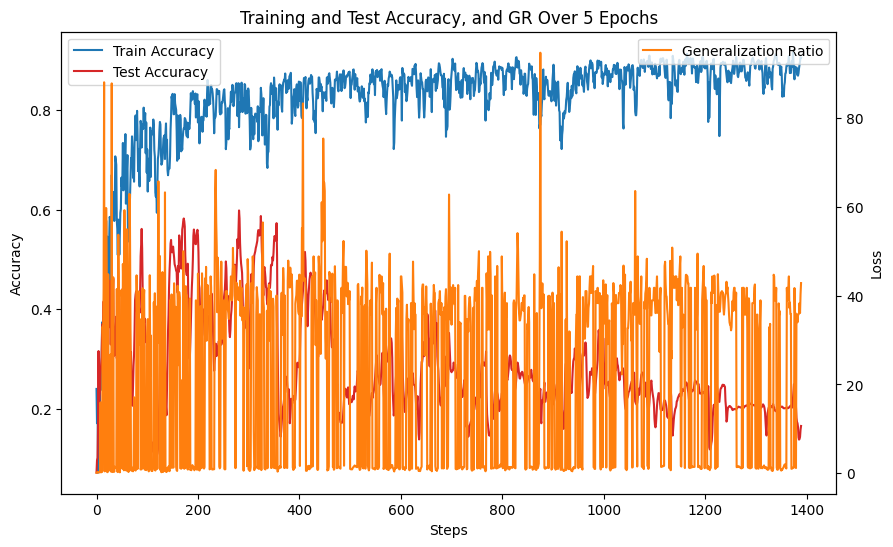

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Steps')
ax1.set_ylabel('Accuracy')
ax1.plot(a_train, label='Train Accuracy', color='tab:blue')
ax1.plot(a_test, label='Test Accuracy', color='tab:red')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Loss')
ax2.plot(Generalization_Ratio_, label='Generalization Ratio', color='tab:orange')
ax2.legend(loc='upper right')

plt.title('Training and Test Accuracy, and GR Over 5 Epochs')

# plt.savefig('/content/drive/MyDrive/Colab Notebooks/training_and_test_accuracy_and_GR.tif', format='tiff', dpi=1000)

plt.show()